In [1]:
from hao.Instruction_ViT import Instruction_ViT
from data_ISIC import ISICDataModule
import hao.utils as u
from hao.CLIP import CLIP
import torch
from d2l import torch as d2l

In [2]:
img_size, patch_size, batch_size = 16, 8, 128
num_workers = 4
max_epochs = 5
use_bias = False
restart_train = True
gpu_idx = 0
num_hiddens, mlp_num_hiddens, num_heads, num_blks = 128, 512, 4, 2
emb_dropout, blk_dropout, lr = 0.1, 0.1, 0.1
last_model_path = r'Instruction_pth/last_model.pth'
best_model_path = r'Instruction_pth/best_model.pth'
categories = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
texts = [f'a photo of {c}' for c in categories]
num_classes = len(categories)
device = "cuda" if torch.cuda.is_available() else "cpu"


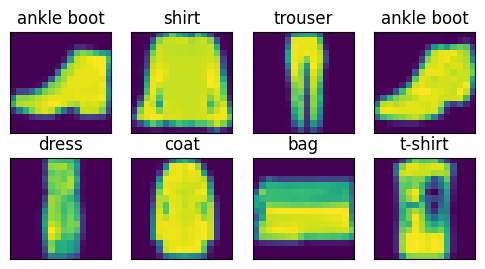

In [3]:
data = d2l.FashionMNIST(batch_size, resize=(img_size, img_size))
train_loader = data.get_dataloader(train=True)
test_loader = data.get_dataloader(train=False)

batch = next(iter(train_loader))
data.visualize(batch, nrows=2, ncols=4)

In [4]:
model = Instruction_ViT(img_size, patch_size, num_hiddens, mlp_num_hiddens, num_heads,
            num_blks, emb_dropout, blk_dropout, texts, lr, use_bias, num_classes, device)
trainer = u.Trainer(max_epochs, last_model_path, best_model_path, restart_train, gpu_idx)


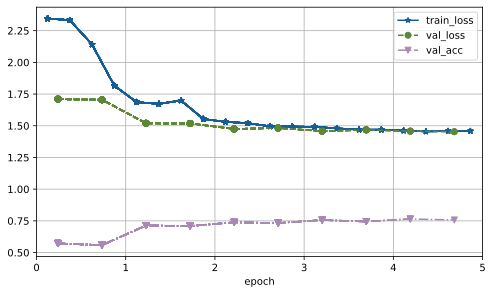

In [5]:
trainer.fit(model, data)

In [6]:
trainer.print_training_his(max_epochs)

Epoch 1 : train loss 2.1583 val loss 1.7058 val acc 56.68%
Epoch 2 : train loss 1.6523 val loss 1.5162 val acc 71.33%
Epoch 3 : train loss 1.5104 val loss 1.4777 val acc 73.56%
Epoch 4 : train loss 1.4764 val loss 1.4619 val acc 75.28%
Epoch 5 : train loss 1.4598 val loss 1.4543 val acc 76.15%
